In [1]:
import numpy as np
import h5py
import os, sys
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import savgol_filter
import pandas as pd
sys.path.append('/Users/ajc/CODES/ats/tools/utils/')
import get_transect_data
sys.path.append('/Users/ajc/mytests/Observations/PyScript')
import readdata as rd

In [2]:
Data_B = dict()
infile='/Users/ajc/mytests/simulations/hillslope/2019/MaxSnow/MS_B_1R1/visdump_surface_data.h5'
Data_B = rd.GetSurfVarFromVis(infile, 'surface-ponded_depth', 0)
d = rd.GetSurfVarFromVis(infile, 'surface-pressure', 0)
Data_B.update(d)

print (Data_B.keys())


['surface-ponded_depth', 'surface-pressure']


In [3]:
Data_S30 = dict()
infile='/Users/ajc/mytests/simulations/hillslope/2019/MaxSnow/MS_S30_1R1/visdump_surface_data.h5'
Data_S30 = rd.GetSurfVarFromVis(infile, 'surface-ponded_depth', 0)
d = rd.GetSurfVarFromVis(infile, 'surface-pressure', 0)
Data_S30.update(d)

In [4]:
Data_S60 = dict()
infile='/Users/ajc/mytests/simulations/hillslope/2019/MaxSnow/MS_S60_1R1/visdump_surface_data.h5'
Data_S60 = rd.GetSurfVarFromVis(infile, 'surface-ponded_depth', 0)
d = rd.GetSurfVarFromVis(infile, 'surface-pressure', 0)
Data_S60.update(d)


In [5]:
Data_S90 = dict()
infile='/Users/ajc/mytests/simulations/hillslope/2019/MaxSnow/MS_S90_1R1/visdump_surface_data.h5'
Data_S90 = rd.GetSurfVarFromVis(infile, 'surface-ponded_depth', 0)
d = rd.GetSurfVarFromVis(infile, 'surface-pressure', 0)
Data_S90.update(d)

In [ ]:
%matplotlib
plt.plot(Data_B['surface-ponded_depth'][-365:],'r')
plt.plot(Data_S30['surface-ponded_depth'][-365:],'k')
plt.plot(Data_S60['surface-ponded_depth'][-365:],'c')
plt.plot(Data_S90['surface-ponded_depth'][-365:],'b')
plt.show()

In [ ]:
plt.plot(Data_B['surface-pressure'][-365:],'r')
plt.plot(Data_S30['surface-pressure'][-365:],'k')
plt.plot(Data_S60['surface-pressure'][-365:],'c')
plt.plot(Data_S90['surface-pressure'][-365:],'b')
plt.show()

In [6]:
Data_B['PD'] = np.array([(d - 101325.)/(1000*9.8) for d in Data_B['surface-pressure'][-365:]])
Data_S30['PD'] = np.array([(d - 101325.)/(1000*9.8) for d in Data_S30['surface-pressure'][-365:]])
Data_S60['PD'] = np.array([(d - 101325.)/(1000*9.8) for d in Data_S60['surface-pressure'][-365:]])
Data_S90['PD'] = np.array([(d - 101325.)/(1000*9.8) for d in Data_S90['surface-pressure'][-365:]])

['surface-ponded_depth', 'PD', 'surface-pressure']


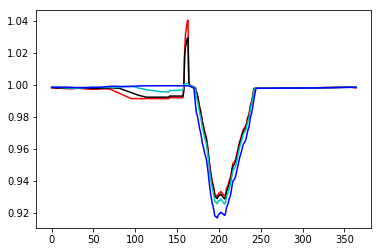

In [11]:
print (Data_B.keys())
var='PD'
plt.plot(0.022+Data_B[var][-365:],'r')
plt.plot(0.022+Data_S30[var][-365:],'k')
plt.plot(0.022+Data_S60[var][-365:],'c')
plt.plot(0.022+Data_S90[var][-365:],'b')
plt.show()

In [ ]:
outfile='/Users/ajc/Documents/MyPapers/MaxSnow/'
fig, axs = plt.subplots(2,2, figsize=(5,5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[2,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
axs = axs.ravel()

print MS_B_tarea,MS_B_area
print MS_S30_tarea,MS_S30_area
print MS_S60_tarea,MS_S60_area
print MS_S90_tarea,MS_S90_area

B = (MS_B_tarea*0 + MS_B_area)/MS_B_tarea * 100
S30 = (MS_S30_tarea*0 + MS_S30_area)/MS_S30_tarea * 100
S60 = (MS_S60_tarea*0 + MS_S60_area)/MS_S60_tarea * 100
S90 = (MS_S90_tarea*0 + MS_S90_area)/MS_S90_tarea * 100
print B,S30, S60,S90

explode = (0.1, 0)  # explode 1st slice
plt.subplot(221)
wedges, texts, autotexts = plt.pie([B, 100-B], radius=1.2, explode=explode,colors=['r','gray'], autopct='%1.f%%', shadow=True, startangle=-45)
plt.setp(autotexts, size=8, weight="bold")
plt.xlabel('Basecase',fontsize=12)
plt.axis('equal')


ax2=plt.subplot(222)
ax2.pie([S30, 100-S30], explode=explode, colors=['r','gray'], autopct='%1.0f%%', shadow=True, startangle=-45)
ax2.axis('equal')
ax2.set_xlabel('S30',fontsize=12)

plt.subplot(223)
plt.pie([S60, 100-S60], explode=explode, colors=['r','gray'], autopct='%1.0f%%', shadow=True, startangle=-45)
plt.axis('equal')
plt.xlabel('S60',fontsize=12)

plt.subplot(224)
plt.pie([S90, 100-S90], explode=explode, colors=['r','gray'], autopct='%1.0f%%', shadow=True, startangle=-45)
plt.axis('equal') 
plt.xlabel('S90',fontsize=12)

plt.legend(wedges, ['Above -4 C','Below -4 C'], loc="center left",ncol=1,
          bbox_to_anchor=(-0.5, .6, 0.5, 1.0))


#plt.legend(loc='upper left',fontsize=10)#, ncol=4, bbox_to_anchor=(1.0,-0.35, .1, .1))
  
#plt.tight_layout()
plt.savefig(outfile+'area-%s-%s.pdf'%(temp,xlen), bbox_inches='tight', dpi=600)
plt.show()